# Credit Card Lead Prediction

### Problem Statement:

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.
 
The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 
 
In this case, the Happy Customer **Bank wants to cross sell its credit cards to its existing customers**. The bank has identified a set of customers that are eligible for taking these credit cards.
 
Now, **the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card**, given:
* Customer details (gender, age, region etc.)
* Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)


Data Dictionary:

**Train Data**
Variable | Definition

* ID | Unique Identifier for a row
* Gender | Gender of the Customer
* Age | Age of the Customer (in Years)
* Region_Code | Code of the Region for the customers
* Occupation | Occupation Type for the customer
* Channel_Code | Acquisition Channel Code for the Customer  (Encoded)
* Vintage | Vintage for the Customer (In Months)
* Credit_Product | If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)
* Avg_Account_Balance | Average Account Balance for the Customer in last 12 Months
* Is_Active | If the Customer is Active in last 3 Months
* Is_Lead(Target) | If the Customer is interested for the Credit Card0 : Customer is not interested1 : Customer is interested

**Test Data**

Variable | Definition

* ID | Unique Identifier for a row
* Gender | Gender of the Customer
* Age | Age of the Customer (in Years)
* Region_Code | Code of the Region for the customers
* Occupation | Occupation Type for the customer
* Channel_Code | Acquisition Channel Code for the Customer  (Encoded)
* Vintage | Vintage for the Customer (In Months)
* Credit_Product | If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)
* Avg_Account_Balance | Average Account Balance for the Customer in last 12 Months
* Is_Active | If the Customer is Active in last 3 Months

Evaluation Metric : **ROC_AUC**


In [1]:
#importing necessary packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt 
from datetime import timedelta 

In [2]:
import os
os.getcwdb()

b'/home/jovyan'

In [3]:
#loading train and test dataset
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

## train data

In [4]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


#### missing values

In [6]:
train.isna().sum()/train.shape[0]*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [7]:
# Replacing null values with 'Not Sure' for both train.
train['Credit_Product'].fillna("Not Sure", inplace = True)

#### Typecasting

In [8]:
# converting all the object datatype into categorical
train['ID'] = train['ID'].astype('category')
train['Gender'] = train['Gender'].astype('category')
train['Region_Code'] = train['Region_Code'].astype('category')
train['Occupation'] = train['Occupation'].astype('category')
train['Channel_Code'] = train['Channel_Code'].astype('category')
train['Credit_Product'] = train['Credit_Product'].astype('category')
train['Is_Active'] = train['Is_Active'].astype('category')
train['Is_Lead'] = train['Is_Lead'].astype('category')

In [9]:
train.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                category
dtype: object

## test data

In [10]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


#### missing values

In [12]:
test.isna().sum()/test.shape[0]*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [13]:
# Replacing null values with 'Not Sure' for both test.
test['Credit_Product'].fillna("Not Sure", inplace = True)

#### Typecasting

In [14]:
# converting all the object datatype into categorical
test['ID'] = test['ID'].astype('category')
test['Gender'] = test['Gender'].astype('category')
test['Region_Code'] = test['Region_Code'].astype('category')
test['Occupation'] = test['Occupation'].astype('category')
test['Channel_Code'] = test['Channel_Code'].astype('category')
test['Credit_Product'] = test['Credit_Product'].astype('category')
test['Is_Active'] = test['Is_Active'].astype('category')

In [15]:
test.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
dtype: object

## Exploratory Data Analysis

### Univariate Analysis

#### Numerical Variables

In [16]:
# creating a variable which consists of only numerical variables
numerical = train.select_dtypes(include = ['int64'])

In [17]:
# checking the range of each numerical variable in the dataset
for i in numerical.columns:
    print(f'range of {i}:[{train[i].min()}, {train[i].max()}]')

range of Age:[23, 85]
range of Vintage:[7, 135]
range of Avg_Account_Balance:[20790, 10352009]


In [18]:
# defining a function to have a look at the line plots of each numerical variables
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

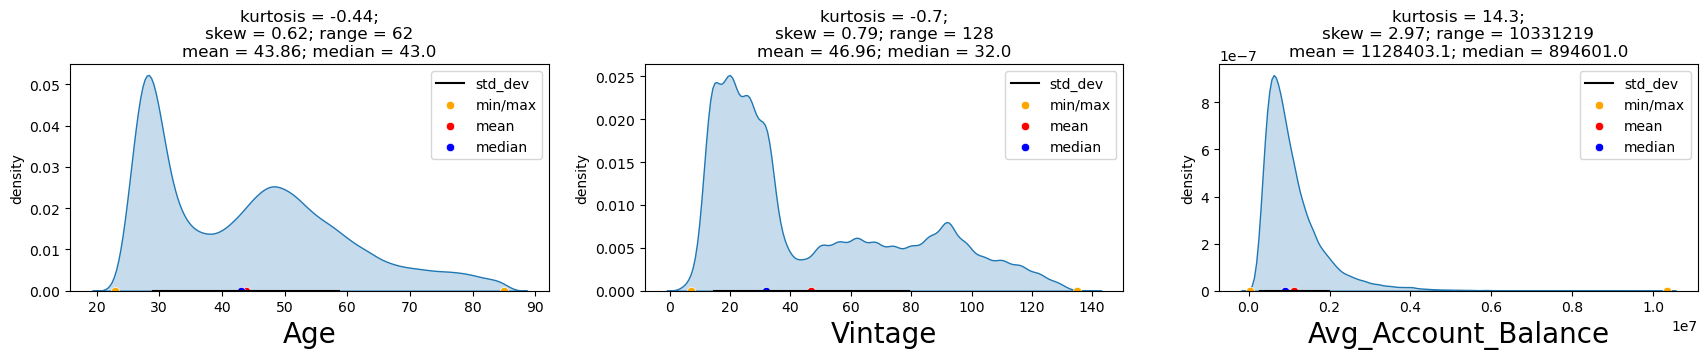

In [19]:
UVA_KDE(train,['Age','Vintage','Avg_Account_Balance'])

From the above distribution plots, we get some important insights about the data:
* Majority of the customers are between the **`Age`** of 23 to 37. The minimum age of the customer is 23 and the maximum is 85.
* We can observe, most of the **`Vintage`** for the customers lie between 7 to 40 months. The minimum vintage for the customer is 7 months and the maximum is 135.
* We can also observe, **`Avg_Account_Balance`** is highly right skewed. It means that majority of the customers have their Avg_Account_Balance between lower end of the tail. The least Avg_Account_Balance is 20790 and the highest is 10352009.  

Now that we have looked at the distribution of the numerical variables, we now se the boxplots of them to look at the outliers if any are present.

In [20]:
# defining a function to have a look at the box plots of each numerical variables
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

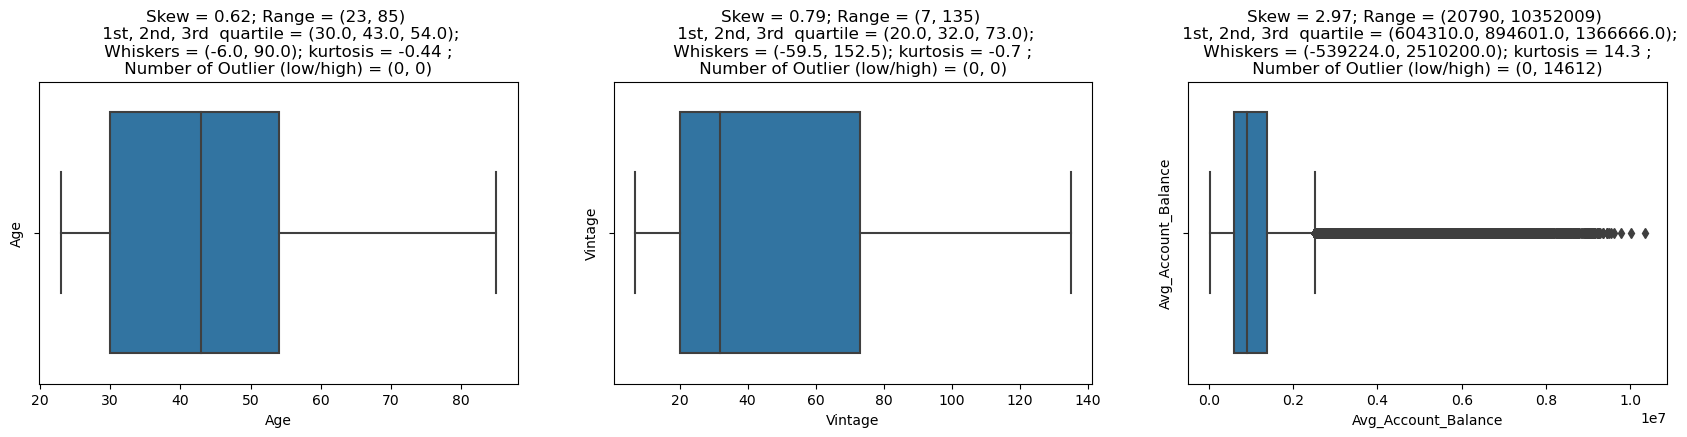

In [21]:
UVA_boxplot(train,['Age','Vintage','Avg_Account_Balance'])

We can observe that there is a large number of outliers in the **Avg_Account_Balance** feature. Also, let's check how many outliers are there in the data.

In [22]:
avg_balance_quant25 = train["Avg_Account_Balance"].quantile(0.25)
avg_balance_quant75 = train["Avg_Account_Balance"].quantile(0.75)
avg_balance_IQR = avg_balance_quant75 - avg_balance_quant25
avg_balance_med = train["Avg_Account_Balance"].median()
avg_balance_whis_high = avg_balance_med+(1.5*avg_balance_IQR)
avg_balance_whis_high

2038135.0

The value of whisker high for the **`Avg_Account_Balance`** is around 1737610. Any values higher that this are outliers. We now see how many outliers are present in the data.

In [23]:
out_avg_balance = train[train['Avg_Account_Balance'] < 2038135]
no_of_outliers = train.shape[0] - out_avg_balance.shape[0]
print(f"Total percentage of outliers: {round((no_of_outliers/train.shape[0])*100, 2)}")

Total percentage of outliers: 10.08


We can see that around 10% of the total data  in **`Avg_Account_Balance`** are outliers. That is a very huge amount of data and they cannot be removed from the dataset as it will result in a huge amount of data loss. Instead we will replace them with the whiskar high value of the column.

In [24]:
train['Avg_Account_Balance'][train['Avg_Account_Balance'] > avg_balance_whis_high] = int(avg_balance_whis_high)

#### Categorical Variables

In [25]:
# defining a function to do univariate analysis of each categorical variable
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (8*size,6), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.tight_layout()

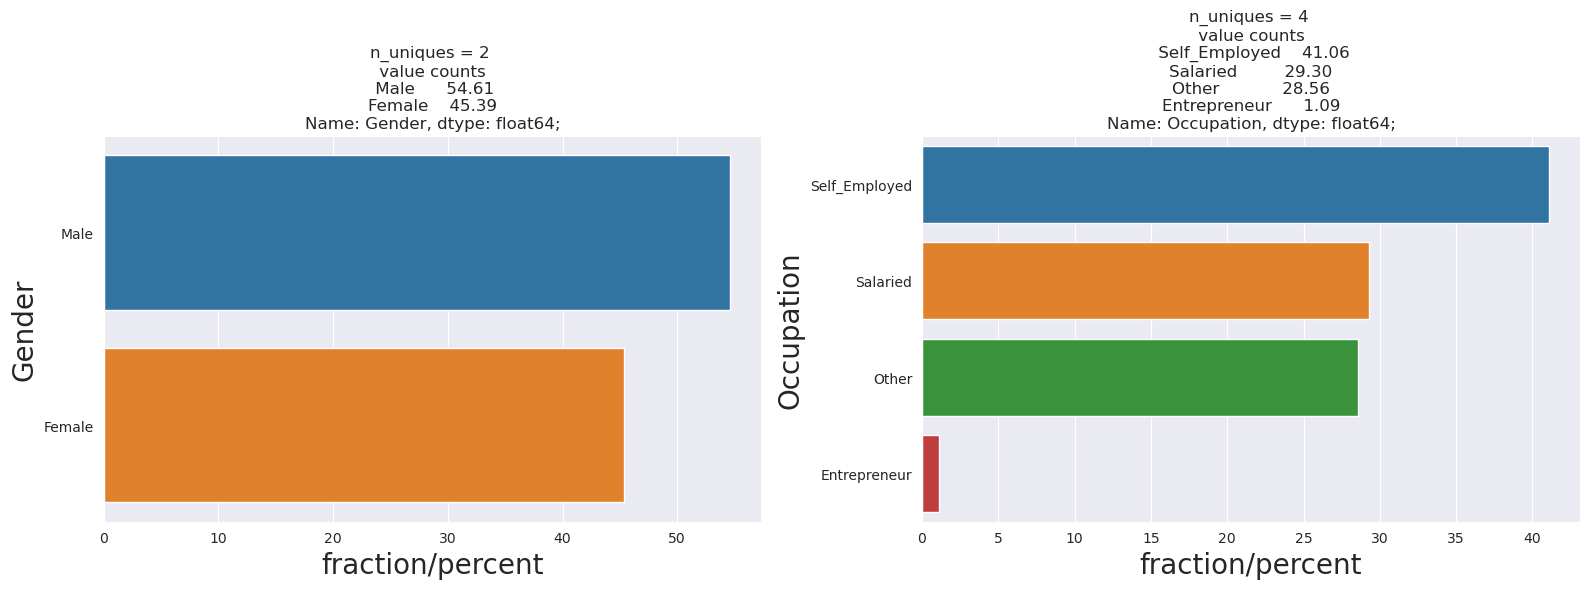

In [26]:
UVA_category(train, ['Gender','Occupation'])

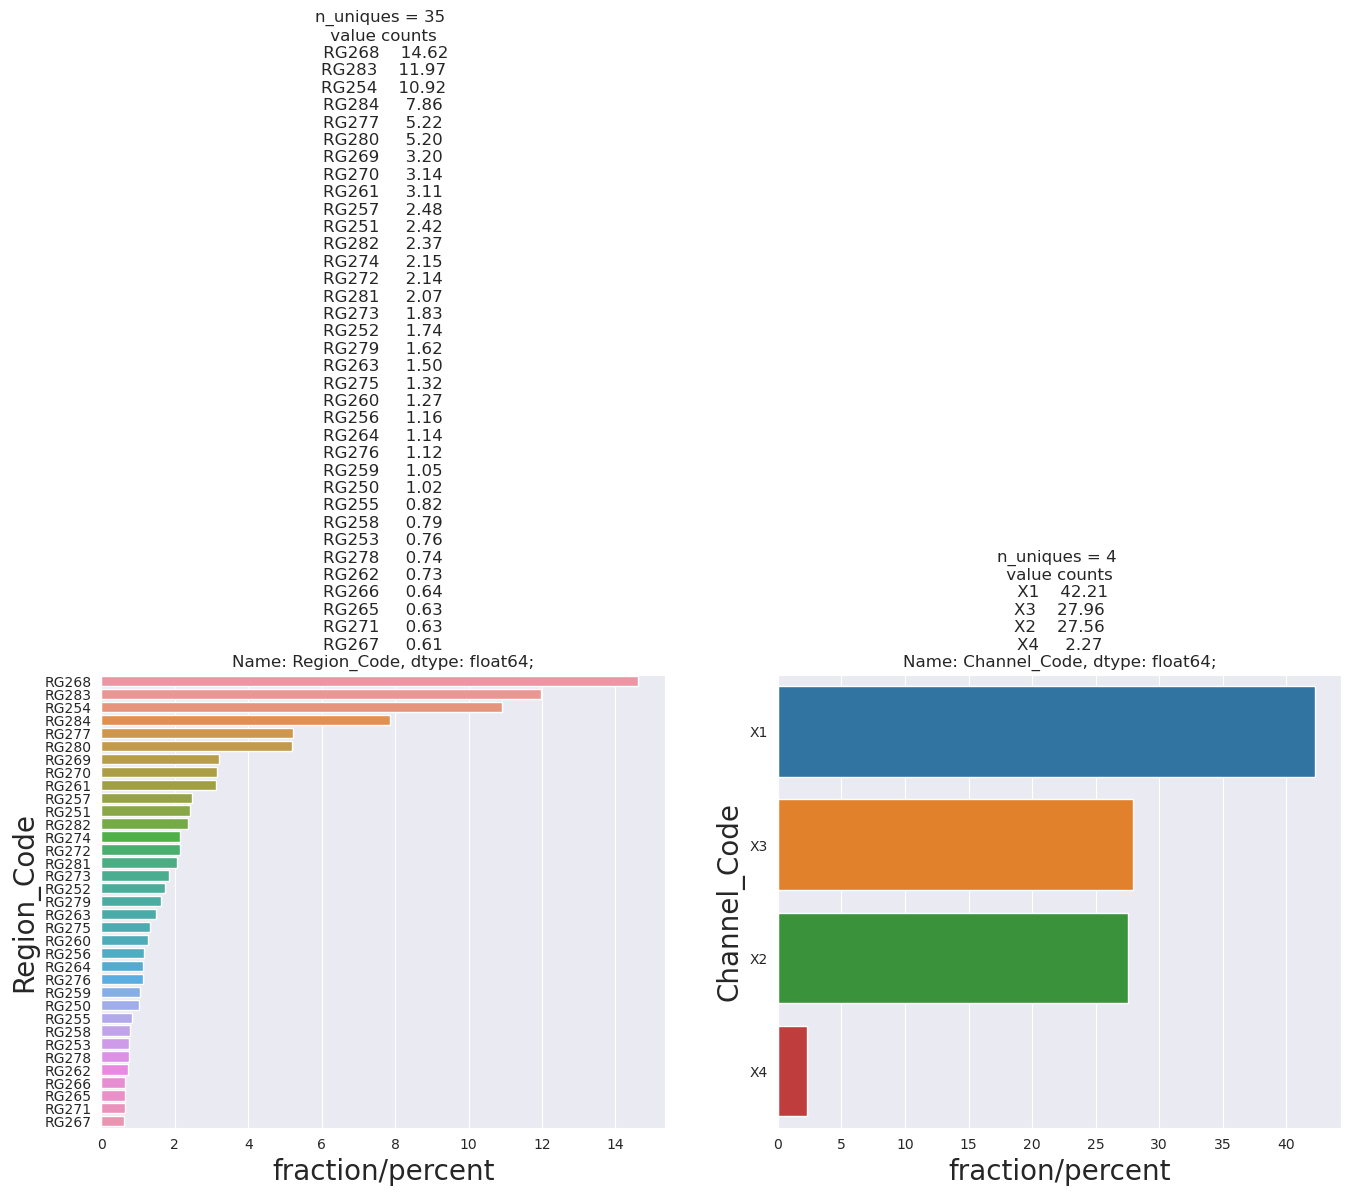

In [27]:
UVA_category(train, ['Region_Code','Channel_Code'])

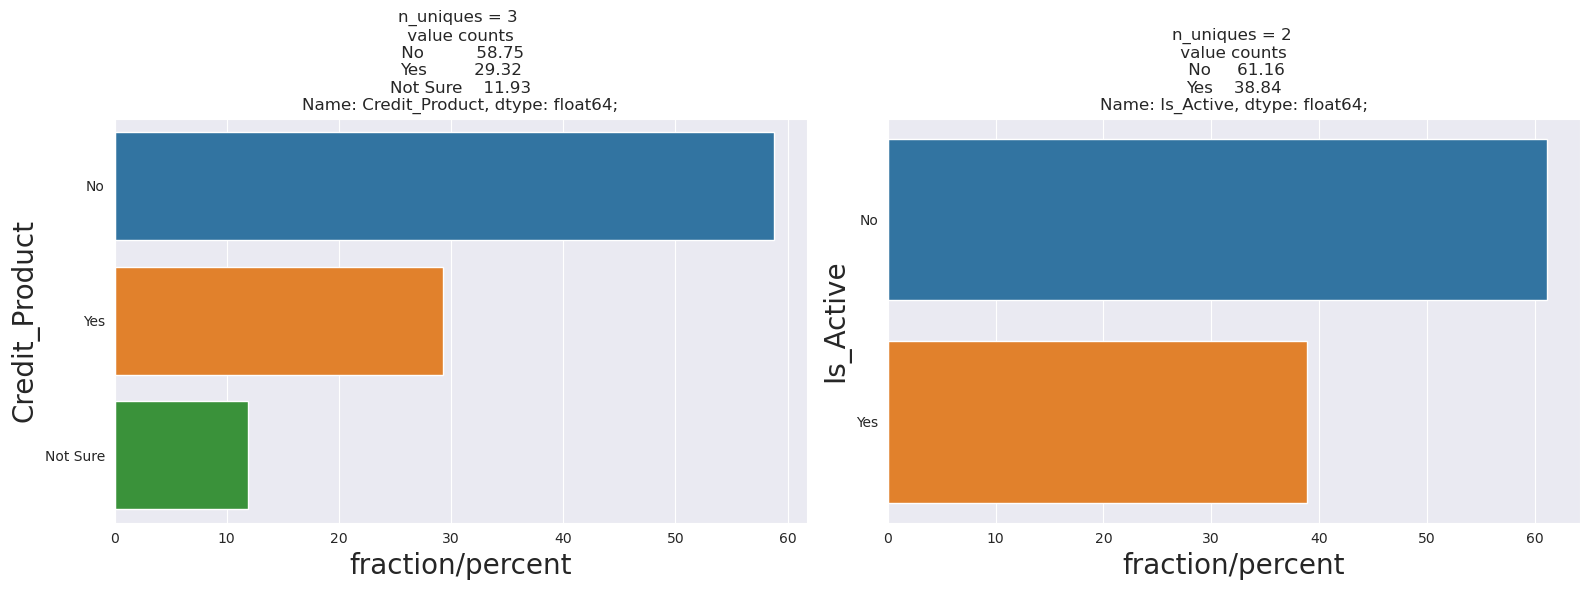

In [28]:
UVA_category(train, ['Credit_Product','Is_Active'])

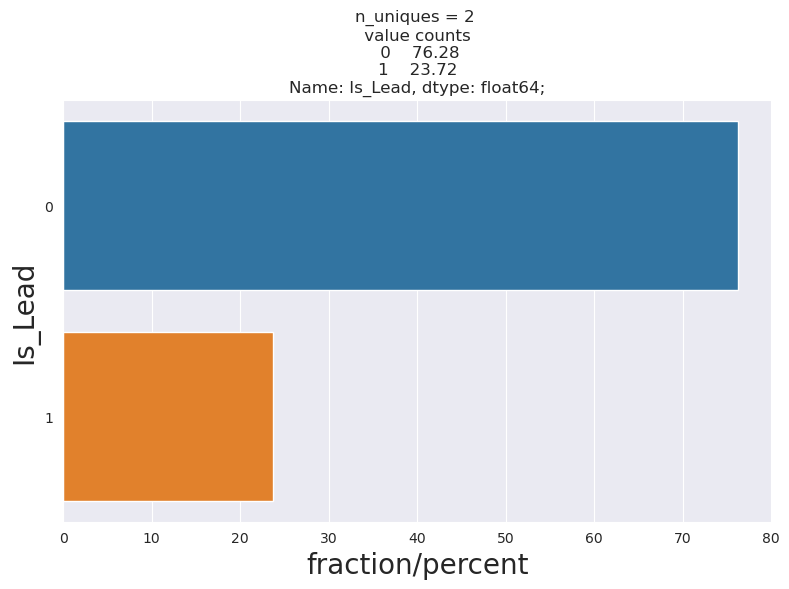

In [29]:
UVA_category(train, ['Is_Lead'])

Again from the above countplots of the categorical features, we get a lot of information and insights about the data:

* For the variable **`Gender`**, around 55% of the customers are male and the rest are female.
* For the variable **`Occupation`**, around 41% of the customers are self employed, 29% are salaried, 29% of them belong to other occupations and only 1% of them entrepreneurs.
* Now we see the variable **`Region_Code`**, most number of the customers belong to the region RG268 and the least number of customers belong to RG267.
* In the variable **`Channel_Code`**, X1 has acquired the most number customers and X4 as the least.
* For the variable **`Credit_Product`**, 67% of the customers does not have any active product and 33% of them do have an active credit product.
* For the variable **`Is_Active`**, around 39% of the customers were active in the last 3 months.
* For the variable **`Is_Lead`**, only 24% of the customers are interested for the credit card and the rest are not interested.

### Bivariate Analysis

#### Numerical - Numerical Variables

In [30]:
numerical = train.select_dtypes(exclude = ['category'])[:]
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
dtype: object

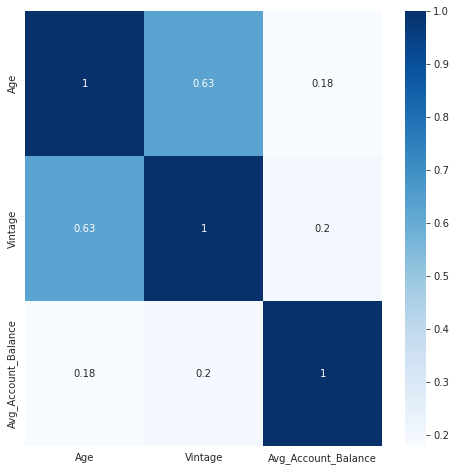

In [31]:
rounded = round(train.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='Blues', annot=True)
plt.show()

As we can see above that **`Age`** and **`Vintage`** are positively correlated to each other.

<AxesSubplot:xlabel='Age', ylabel='Vintage'>

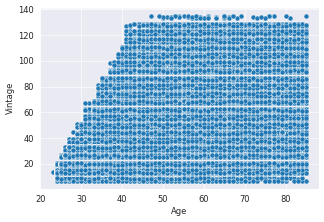

In [32]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Age'], numerical['Vintage'])

#### Categorical -  Categorical Variables

In [33]:
Categorical = train.select_dtypes(include = ['category'])[:]
Categorical.dtypes

ID                category
Gender            category
Region_Code       category
Occupation        category
Channel_Code      category
Credit_Product    category
Is_Active         category
Is_Lead           category
dtype: object

In [34]:
train = train.drop('ID',1)

In [35]:
test = test.drop('ID',1)

#### List of Hypothesis to check:
* Does customer's interest for credit card depends on gender?
* Do occupation of customers plays an important role in deciding whether one will take credit card or not?
* Do active customers have high frequency of taking credit card service?
* Is credit of any type leads to take credit card?
* Are acquisition channel an important source in deciding whether customer will take service or not?
* Is region of customer an important factor in deciding the activation of service?

Text(0.5, 1.0, 'Gender Wise Customer Response in the Recommended Credit Cards')

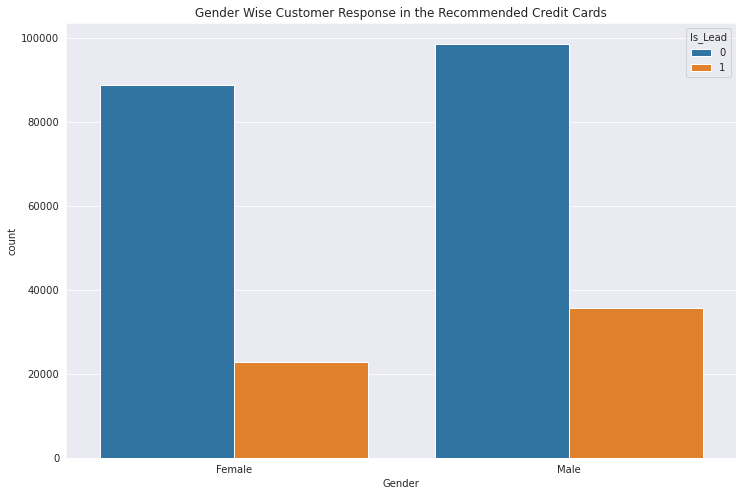

In [36]:
plt.figure(figsize = (12,8))
sns.countplot(x='Gender', hue='Is_Lead', data=train).set_title('Gender Wise Customer Response in the Recommended Credit Cards')

* The count plot shows that male customers are highly interests in recommended credit cards when compare to female customers.
* The percentage of customers not interested in the recommended policies is high in both genders.

Text(0.5, 1.0, 'Occupation Wise Customer Response in the Recommended Credit Cards')

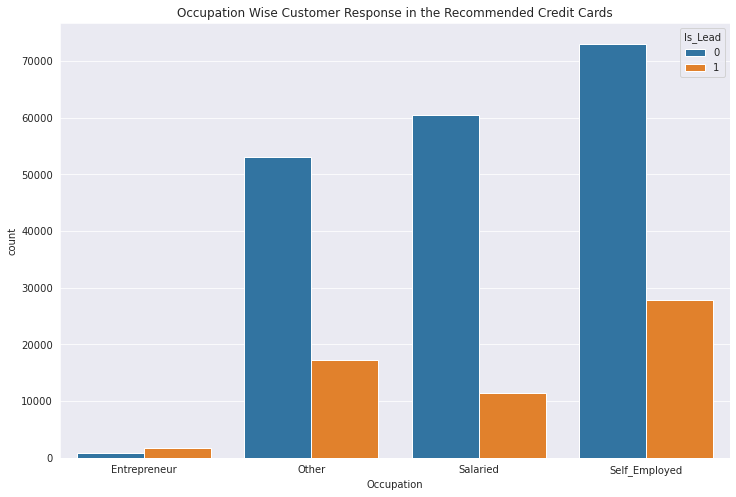

In [37]:
plt.figure(figsize = (12,8))
sns.countplot('Occupation', hue = 'Is_Lead', data = train).set_title('Occupation Wise Customer Response in the Recommended Credit Cards')

* Self employed people are highly interested in recommended credit cards as compared to others.

Text(0.5, 1.0, 'Active and Non Active Customer Response in the Recommended Credit Cards in last 3 months')

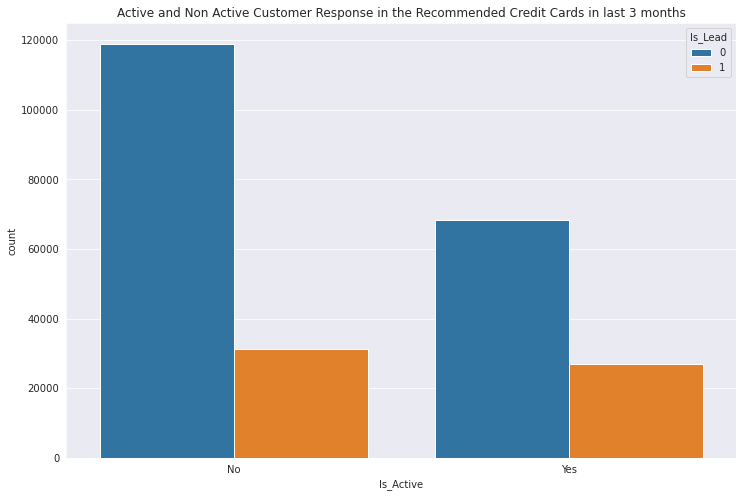

In [38]:
plt.figure(figsize = (12,8))
sns.countplot(x='Is_Active', hue='Is_Lead', data=train).set_title('Active and Non Active Customer Response in the Recommended Credit Cards in last 3 months')

* Non Active customers have slightly higher percentage of customers interested for the credit card as compared to active customers. But at the same time, the number of customers who are non active and not interested for the credit card is lot more higher than the customers who are active and not interested.

Text(0.5, 1.0, 'Customer Response in the Recommended Credit Cards based on Credit Product')

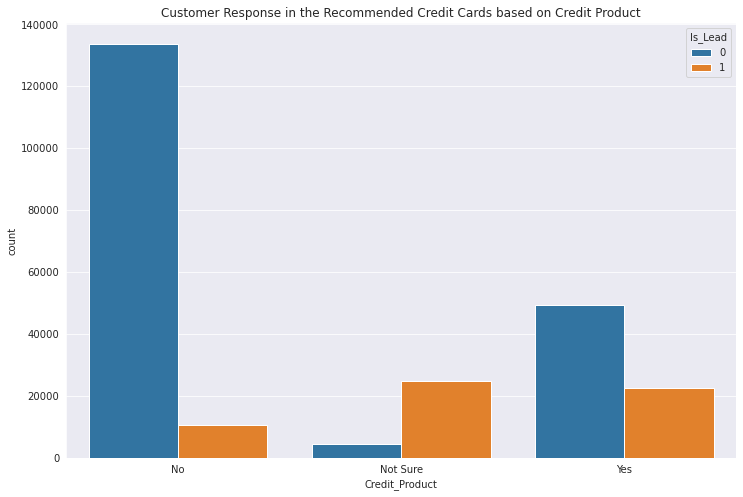

In [39]:
plt.figure(figsize = (12,8))
sns.countplot('Credit_Product', hue = 'Is_Lead', data = train).set_title('Customer Response in the Recommended Credit Cards based on Credit Product')

* Customers who have taken some kind of credit product are more interested for the credit card as compared to the ones who have not taken any credit product.
* Also, it is very strange that most of the leads we get from the customers whom we are not sure of whether they have taken credit product or not.

Text(0.5, 1.0, 'Channel Code Wise Customer Response in the Recommended Credit Cards')

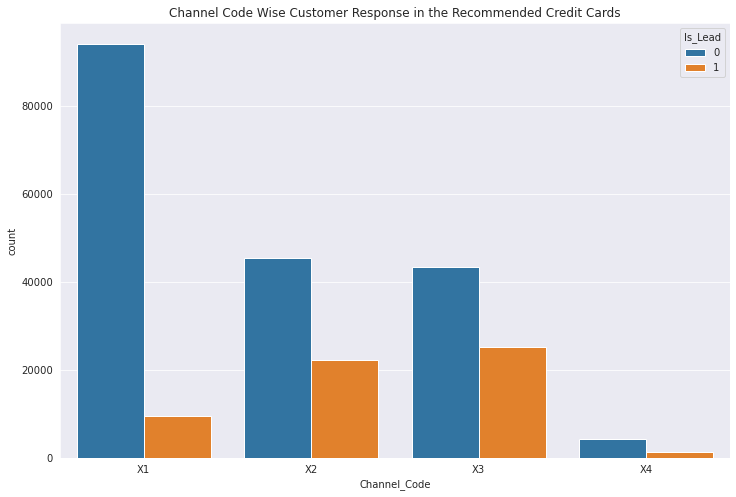

In [40]:
plt.figure(figsize = (12,8))
sns.countplot('Channel_Code', hue = 'Is_Lead', data = train).set_title('Channel Code Wise Customer Response in the Recommended Credit Cards')

* Channel X3 and X2 people are highly interested in recommended credit cards when comapared to others, while people belongs to channel X1 are highly non-interested in recommended credit cards.

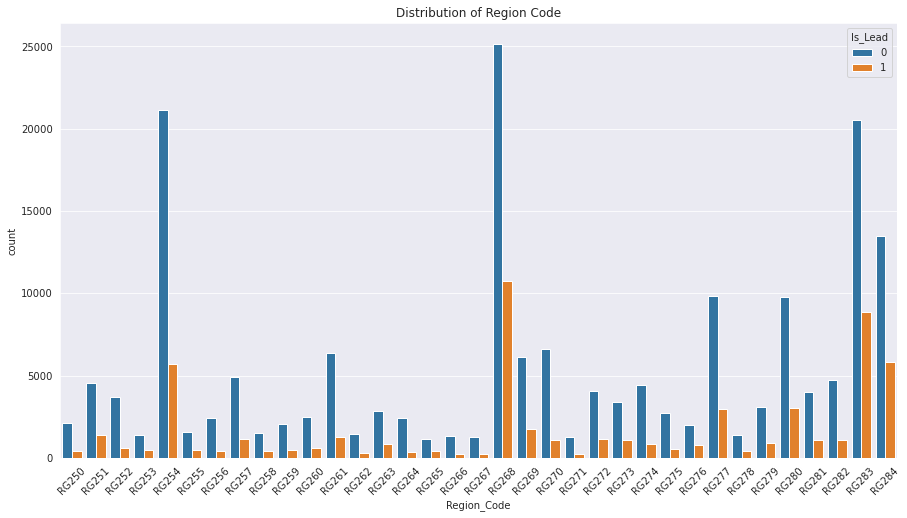

In [41]:
plt.figure(figsize=(15,8))
ax = sns.countplot(train.Region_Code, hue=train.Is_Lead)
ax.set_title('Distribution of Region Code')
plt.xticks(rotation=45)
plt.show()

* Each region code is showing different trend.

#### Categorical - Numerical Variables

#### List of hypothesis to check:
* Do age plays a significant role in deciding whether one will take credit card service or not?
* Does vintage of customers matter in activating credit card service?
* Can average account balance play a role in deciding whether customer will take credit card or not?

In [42]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

def Bivariate_cont_cat(train, cont, cat, category):
  #creating 2 samples
  x1 = train[cont][train[cat]==category][:]
  x2 = train[cont][~(train[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=train, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=train)
  plt.title('categorical boxplot')

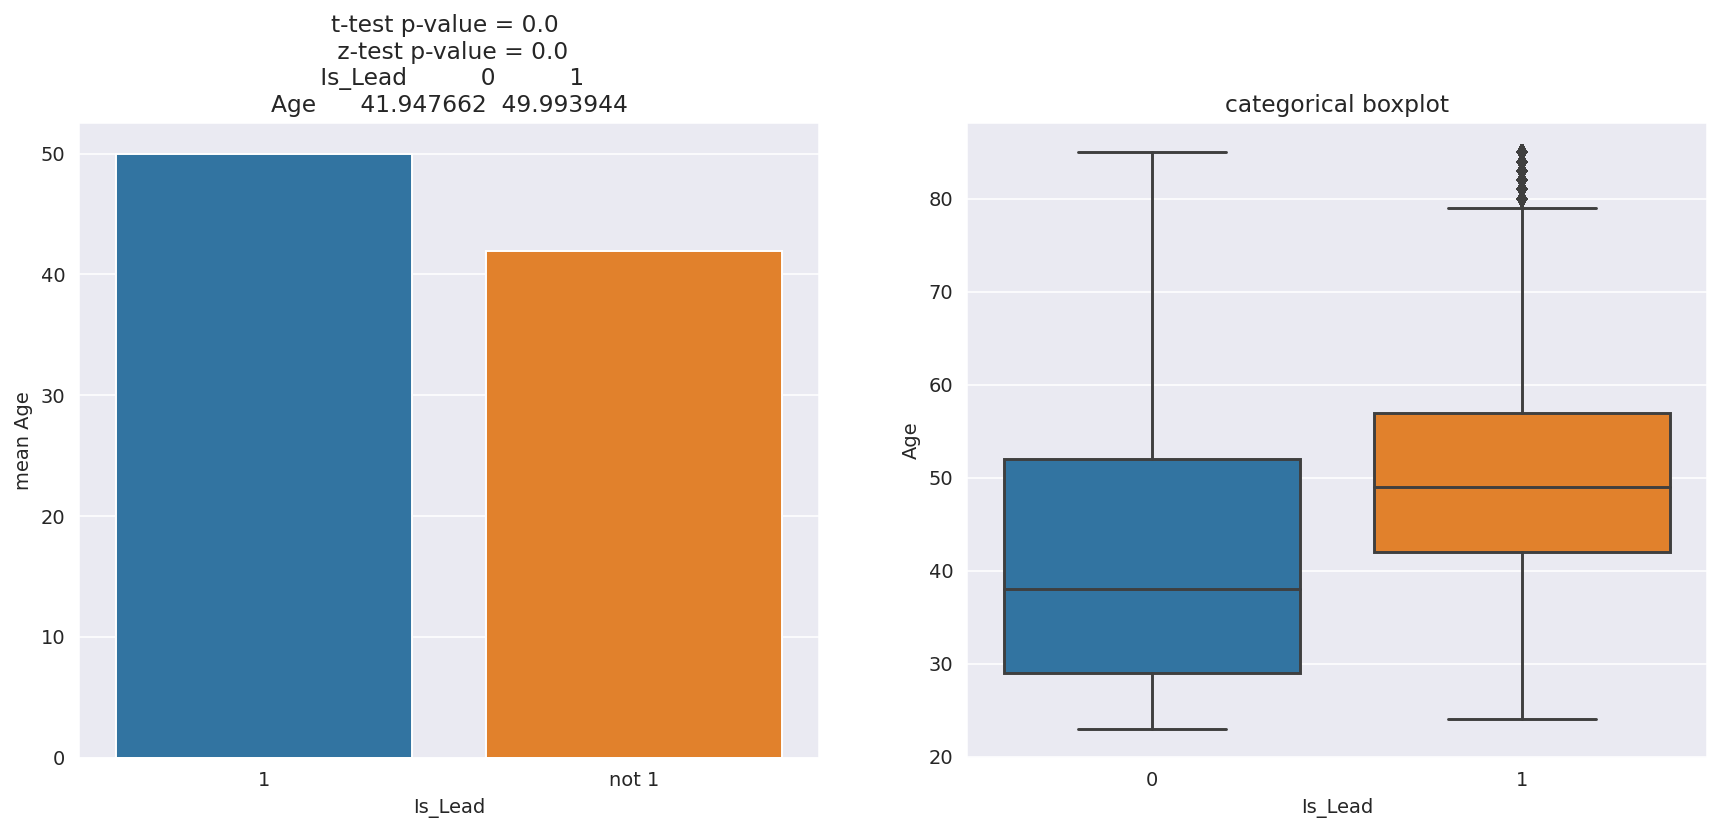

In [43]:
Bivariate_cont_cat(train, 'Age','Is_Lead', 1)

* There seems to be significant difference between the age of person who are interested or not interested for credit card.

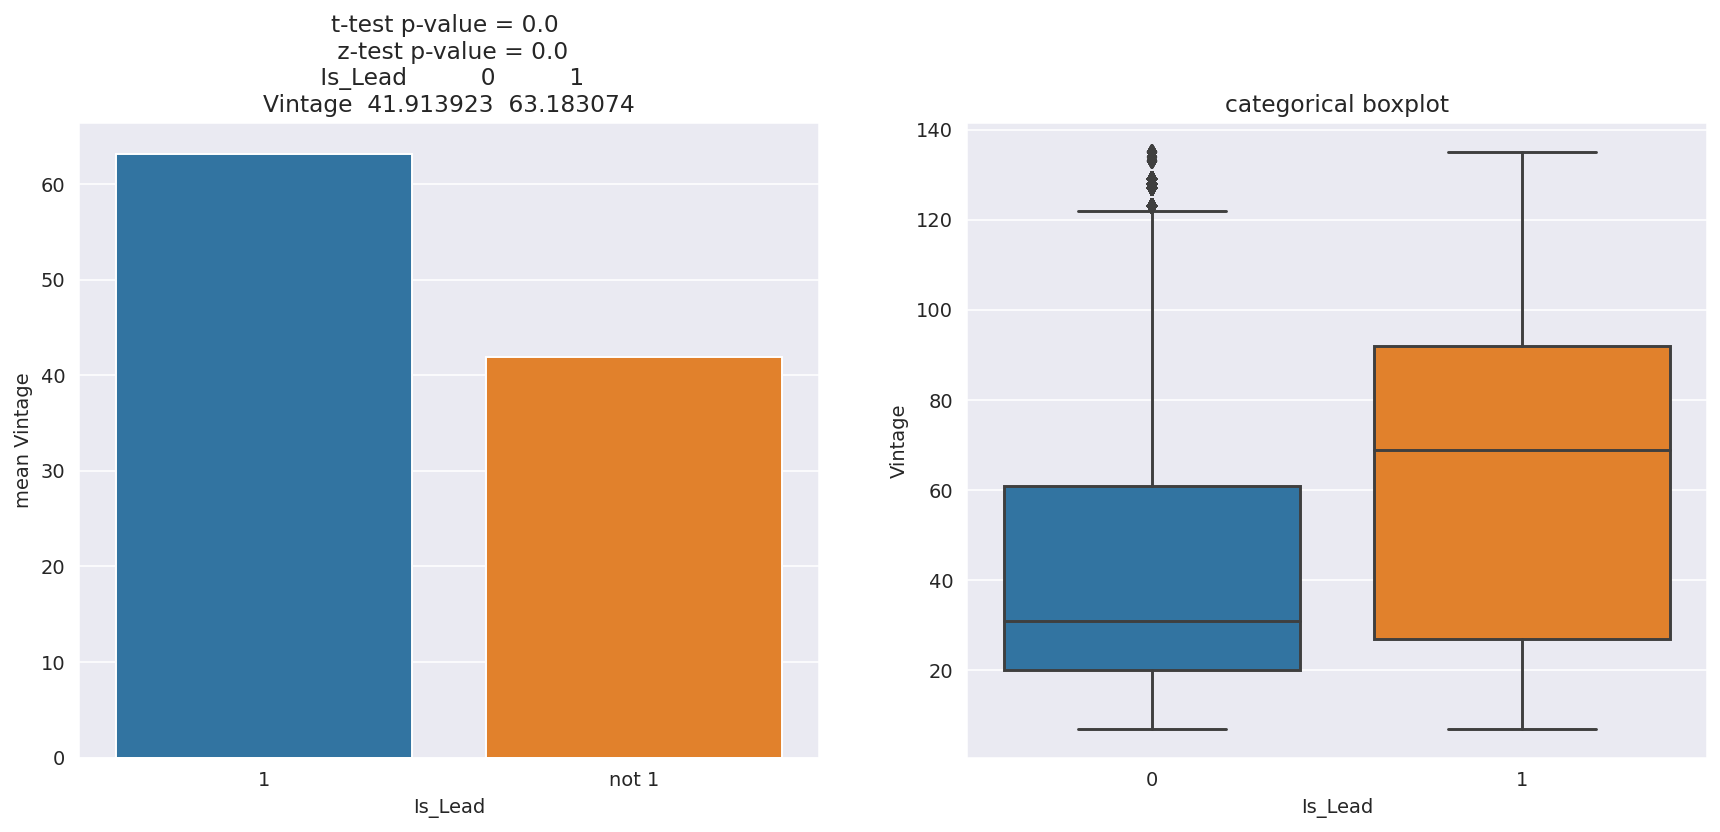

In [44]:
Bivariate_cont_cat(train, 'Vintage','Is_Lead', 1)

* Vintage of the customers plays an important role in deciding whether a customer will take or not take credit card. The higher the vintage the higher the customer is likely to be interested for the credit card.

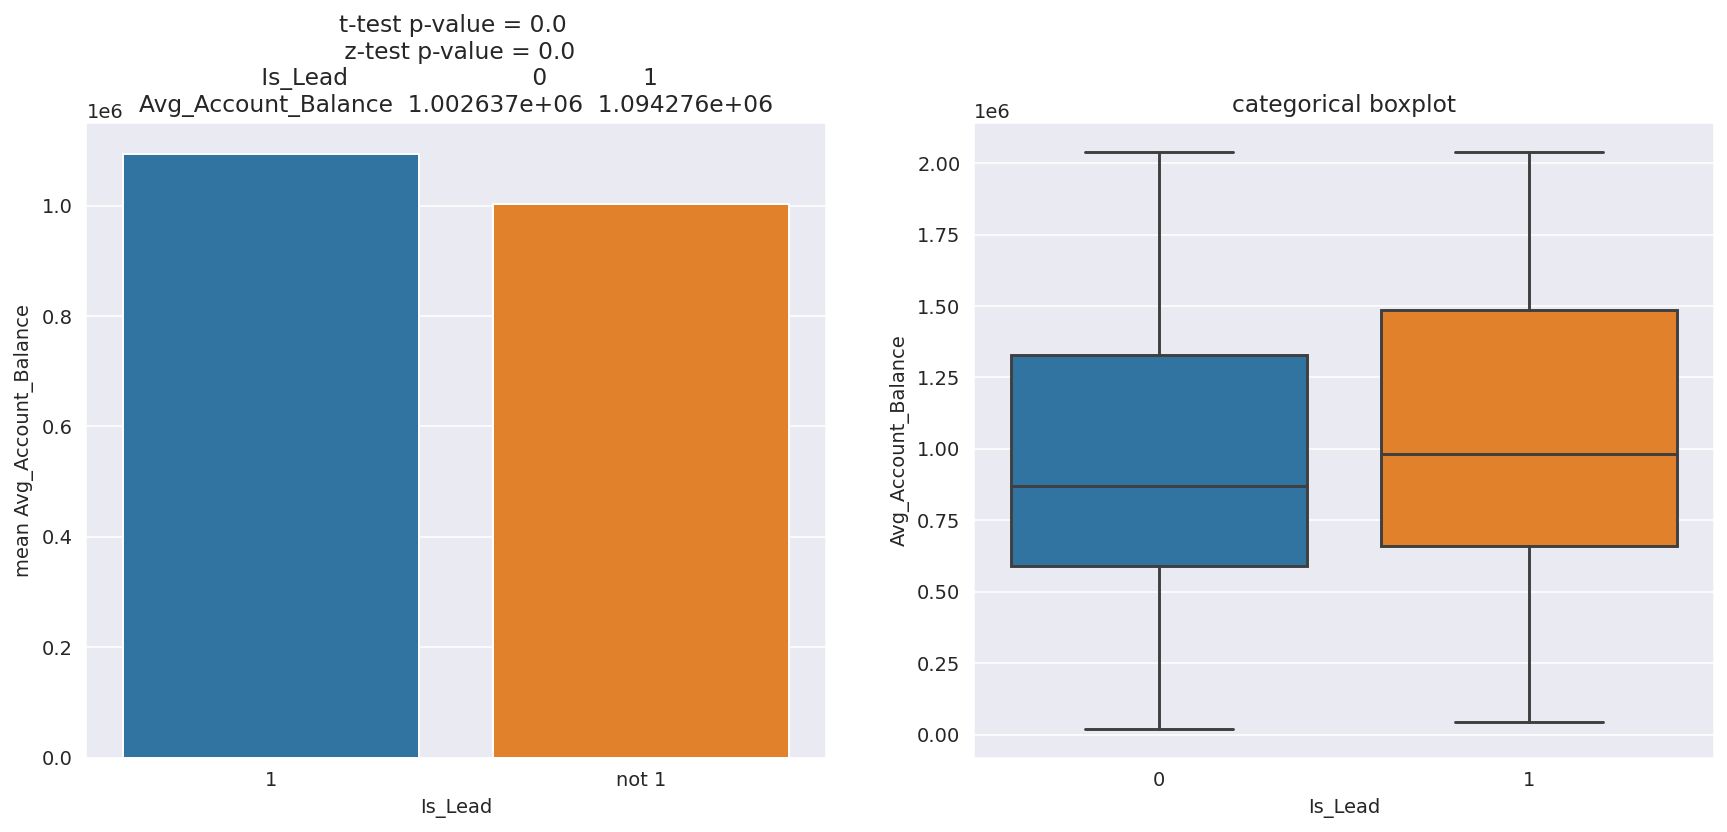

In [45]:
Bivariate_cont_cat(train, 'Avg_Account_Balance','Is_Lead', 1)

* Avg_Account_Balance of customers also plays an important role in deciding whether customer will avail the service of credit card or not. Customers with high avereage account balance are more interested for the credit card.

## Model Building

As we have completed the complete EDA and tested different hypothesis and got various insights from the data, we can now move on to the model building. In order to build the model, we need to clean and encode all the features of the data properly.

#### Dummy Variables
We will create dummy variables for categorical variables.

In [46]:
cat_variables = ['Gender','Region_Code', 'Occupation', 'Channel_Code','Credit_Product', 'Is_Active']

In [47]:
# Creating a dummy variable for some of the categorical variables
dummy_train = pd.get_dummies(train[cat_variables])
dummy_test = pd.get_dummies(test[cat_variables])

In [48]:
# Adding the results to leads_data
train = pd.concat([train, dummy_train], axis=1)
test = pd.concat([test, dummy_test], axis=1)

In [49]:
# Dropping repeated variable
train.drop(cat_variables,axis=1,inplace=True)
test.drop(cat_variables,axis=1,inplace=True)

#### Performing test-train split

In [50]:
#seperating independent and dependent variables
x = train.drop(['Is_Lead'], axis=1)
y = train['Is_Lead']
x.shape, y.shape

((245725, 53), (245725,))

In [51]:
# Normalising using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
x = scaler.fit_transform(x)
test = scaler.transform(test)

In [53]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

#### Implementing Logistic Regression

In [54]:
#importing Logistic Regression and metric roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score

In [55]:
logreg=LogisticRegression()
logreg.fit(train_x,train_y)
y_pred=logreg.predict_proba(test_x)[:,1]

In [56]:
roc_auc_score(test_y,y_pred)

0.8580947224302562

#### Prediction on test data

In [57]:
final_pred = logreg.predict_proba(test)[:,1]

In [58]:
final_pred

array([0.09321293, 0.80886482, 0.05225262, ..., 0.10005759, 0.12182265,
       0.04874086])

In [59]:
prediction = []
for i in final_pred:
    if i > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [60]:
predictions = np.array(prediction)

In [61]:
test1 = pd.read_csv("test_mSzZ8RL.csv")

In [62]:
test1['Final_Prediction'] = final_pred
test1['Is_Lead'] = predictions

In [63]:
test1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Final_Prediction,Is_Lead
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,0.093213,0
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,0.808865,1
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,0.052253,0
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,0.022065,0
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0.019781,0
